# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
#import the libraries we need 
import pandas as pd
import bz2
import numpy as np

#load and store the data from a json form
with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [3]:
#print the head of the data in order to get an idea of the data
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [4]:
#Split the data into training and test
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [5]:
#store the labels(classes)
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by plotting a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

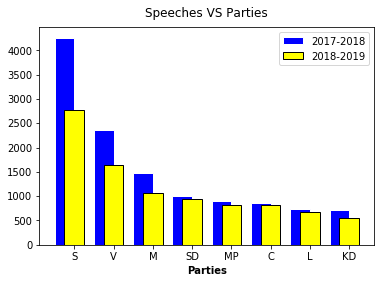

In [6]:
#plot the distribution of the classes
import matplotlib.pyplot as plt
x1 = training_data["party"].unique()
y1 = training_data["party"].value_counts()
x2 = test_data["party"].unique()
y2 = test_data["party"].value_counts()
r1 = np.arange(len(y1))
r2 = [x + 0.25 for x in r1]

plt.bar(r1, y1, color='blue', edgecolor='white',width = 0.5,
 label='2017-2018')
plt.bar(r2, y2, color='yellow', edgecolor='black', width = 0.5,
label='2018-2019')
plt.xlabel('Parties', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(y1))], x1)

plt.title("Speeches VS Parties", y=1.02)
plt.legend()
plt.show()


First of all, it is pretty clear that both datasets are unbalanced. That means that the distribution of classes is skewed instead of uniform. The latter may cause us problem to the classification.

From the plot above we can see that the number of speeches from 17-18 to 18-19  for all the parties is decreasing. For some of them, that decrease is really small(like C or SD) but for some other is significant high. The above can be an explanation, why the Social Democratic party and the moderate party had such a huge fall in the votes.


## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

### Impementation with Pipeline

In [6]:
#import the libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [7]:
#First we have to vectorize the training and the test data
#In that problem we will use count - Vectorization
#It make more sense, because we will use a Bayes Classifier
#Therefore if we have the tf-idf vec. the outputs will be close to zero and it will cause poor output
#vectorizer = CountVectorizer()
#X_train = vectorizer.fit_transform(training_data["words"]) #first fit and transform
#y_train = training_data["party"]
#X_test = vectorizer.transform(test_data["words"]) #only transform
#y_test = test_data["party"]
#Now we fit the multinomial bayessian model
#clf = MultinomialNB()
#clf.fit(X_train,y_train)


#make predictions
#predictions = clf.predict(X_test)

#print the classification report
#print(classification_report(y_test, predictions))

#Here we use pipeline for the preprocessing, fitting the classifier
from sklearn.pipeline import Pipeline


countVector = CountVectorizer()
clf = MultinomialNB()
Pipl_classifier = Pipeline([('CountVec', countVector), ('Naive', clf)])

Pipl_classifier.fit(training_data["words"], training_data["party"])


#predictions with pipeline
Pipl_classifier.score(test_data["words"],test_data["party"])

0.4280792420327304

array(['S', 'S', 'S', ..., 'S', 'S', 'S'], dtype='<U2')

#### Analysis
In this task we implement a Multinomial Bayes classifier with default choice of parameters.

We can now evaluate the classifier using the above results. The accuracy is approximately 43% which is quite low. One can say that we could expected that because of the unbalanced data. Accuracy is just a number though. In order to have a more clear picture, we should compare the accuracies of different models. 


## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

Determine the most frequent class in the 2017/2018 data. What is the accuracy of the MFC baseline on the test data? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [9]:
#In this task we use a Baseline classifier
#First we find the most frequent class of the training data
training_data["party"].value_counts().idxmax()

#And we use that class in order to predict using MFC baseline
MFC_accuracy = test_data["party"].value_counts()["S"]/test_data.shape[0]
print(MFC_accuracy)

#print(classification_report(y_test, predictions))

0.298557278208441


### Analysis

It is obvious that a baseline classifier will give most of the times poor performance. In that case the accuracy of the MFC baseline is approximately 0.3 which is lower by 13% from the Bayes classifier. Therefore, it seems that the structure of the data causes problem in order to predict the classes correct. We can also comment that for the given problem, the accuracy of the Bayes classifier is quite good, even if the 43% seems low.

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [10]:
#Here we implement undersampling
#That means that we have to find the size of the less frequent class and resample the same size for all the other classes

id_min = training_data.groupby("party", as_index= False).count()["id"].idxmin() #id of the less frequent class
min_party = parties[id_min] #the less frequent class
min_len = len(training_data[training_data["party"] == min_party]["party"]) #the lenght of the less frequent class

#We start with a df which contains only the less frequent party
df = training_data[training_data["party"] == min_party]
pars = list(filter(lambda x: x!="L",parties)) #go through the rest of the parties
for par in pars:
    
    #From each class, we sample min_len samples and we add that in the data frame df
    temp = training_data[training_data["party"] == par].sample(min_len, random_state = 12345)
    df = df.append(temp,ignore_index=True)

df

,id,words,party
0,H5-003-008,aktuell debatt om situationen för ensamkommand...,L
1,H5-003-016,herr talman jag lyssnar på migrationsministern...,L
2,H5-003-024,aktuell debatt om situationen för ensamkommand...,L
3,H5-004-031,herr talman jag har den senaste tiden haft anl...,L
4,H5-004-040,herr talman tack försvarsministern för det sva...,L
...,...,...,...
5747,H5-126-017,fru talman penilla gunther lyfte ett antal vik...,V
5748,H5-117-015,fru talman lösningen på skolans utmaningar lig...,V
5749,H5-131-106,herr talman nu kommer jag att låta som en rikt...,V
5750,H5-023-044,fru talman om det är något som jag skulle vilj...,V


In [14]:
#Re run the classifier in the balanced data 
#First we have to vectorize the training and the test data
X = df["words"]
y = df["party"]
X_test = test_data["words"]
y_test = test_data["party"]

countVector = CountVectorizer()
clf = MultinomialNB()
Pipl_classifier = Pipeline([('CountVec', countVector), ('Naive', clf)])

Pipl_classifier.fit(X, y)
predictions_bal = Pipl_classifier.predict(X_test)



#print the classification report
print(classification_report(y_test, predictions_bal))


              precision    recall  f1-score   support

           C       0.28      0.43      0.34       671
          KD       0.32      0.39      0.35       821
           L       0.28      0.43      0.34       560
           M       0.40      0.51      0.45      1644
          MP       0.35      0.39      0.37       809
           S       0.80      0.28      0.42      2773
          SD       0.43      0.42      0.43      1060
           V       0.39      0.57      0.46       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.39      9288
weighted avg       0.49      0.41      0.41      9288



In this task, we try to transform our inbalanced data into a balanced data using undersampling. As we can see from the classification report printed above, the accuracy of the classifier reduced from 43% to 41%. 

Undersampling is a really simple techinque but it can work efficient enough in many causes. In that case thought, it seems that that method can not help. A reason could be that we train our classifier in less data than before(5752 instead of 12343). Moreover, using the count Vectorization technique, the number of features we have is really high(75125). 

## Problem 5: Confusion matrix


A **confusion matrix** is a specific table layout that is useful when analysing the performance of a classifier. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

In [15]:
#Here we will use the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions_bal)

conf_matrix = pd.DataFrame(conf_matrix,index=parties, columns=parties)
conf_matrix

,C,KD,L,M,MP,S,SD,V
C,288,57,47,105,47,18,55,54
KD,87,324,55,158,33,24,66,74
L,52,47,241,63,32,10,45,70
M,192,163,130,831,84,40,110,94
MP,60,56,57,104,316,72,47,97
S,202,221,184,491,321,789,205,360
SD,90,86,98,188,39,16,449,94
V,53,65,59,113,35,16,71,538


In [16]:
#comprehension
res = [(k,v[v!=v[k]].idxmax()) for (k,v) in conf_matrix.iterrows()]
res

[('C', 'M'),
 ('KD', 'M'),
 ('L', 'V'),
 ('M', 'C'),
 ('MP', 'M'),
 ('S', 'M'),
 ('SD', 'M'),
 ('V', 'M')]

The diagonal of the confusion matrix gives us the proportion of each class which classified correctly. In that task, we went through each row in order to find the most common class for each missclassified class. 

In the list above, the first element in the tuple is the true label, and the second is the most common label when the class is misclassified. As we cna see in almost all the classes, the "misleading" class is "M".

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model instead of the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting $n$-grams up to $n = 2$ (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [72]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#We now use grid search for finding the optimal paramaters
#We have to create the pipline in the same way as before
countVector = CountVectorizer()
clf = MultinomialNB()
Pipl_classifier = Pipeline([('CountVec', countVector), 
                            ('Naive', clf)])

#Now we will use the GridSearch 
#denote the parameters
Cv = 5 #folds for cross validation

#store the parameters we want to estimate
parameters = {
    "CountVec__ngram_range":[(1,1),(1,2),(2,2)], #nameOfStep__nameOfParameter
    "CountVec__binary":[True,False],
    "Naive__alpha":[0.1,1]
}

#store the gridsearch
grid = GridSearchCV(Pipl_classifier, param_grid = parameters, cv = Cv)


In [98]:
#Fit the gridSearch
grid.fit(training_data["words"], training_data["party"])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('CountVec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                        

In [31]:
grid.best_estimator_.score(X_test,y_test)


NameError: name 'grid' is not defined

In [ ]:
grid.best_params_

## Problem 6: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

### Preprocess Function

In [13]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import string

#def preprocess(text):
    
    #split the text into words
    #tokens = word_tokenize(text)
    
    #convert all words in lower case
    #tokens = [w.lower() for w in tokens]
     
    #After that we have to remove the punctuations like comma etc
    #table = str.maketrans("","",string.punctuation)
    #stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    #words = [word for word in stripped if word.isalpha()]
     
    #first we remove the most common words that they do not have any value such as eller or och
    #words = [word for word in words if word not in stopwords.words("swedish")]
    
    #Now it is time for steam the words
    #words = [stemmer.stem(w) for w in words]
    
    #should return Array
    #return words

table = str.maketrans("","",string.punctuation)
stop_words = stopwords.words("swedish")
stemmer = SnowballStemmer("swedish")
def preprocess(text):
    
    tokens = word_tokenize(text)
    final_words = []
    for word in tokens:
        word = word.lower().translate(table)
        
        if word.isalpha() and word not in stop_words:
            final_words.append(stemmer.stem(word))
    return final_words

input_text = "NLP är ett delområde inom maskininlärning."
preprocess(input_text)



['nlp', 'delområd', 'maskininlärning']

### Model Selection

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import nltk
from nltk.corpus import stopwords


In [21]:
#First we have to do some model selection
#We will try different models such as random forest, Linear SVC, Multinomail Bayes and Logistic Regression
countVector = CountVectorizer(tokenizer=preprocess)
pipelines = [
    ("Random_Forest",
     Pipeline([('CountVec', countVector), ("Random_Forest", RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0))])),
    ("LinearSVC",
     Pipeline([('CountVec', countVector), ("LinearSVC", LinearSVC())])),
    ("MultinomialNB",
     Pipeline([('CountVec', countVector), ("MultinomialNB", MultinomialNB())])),
    ("LogisticRegression",
     Pipeline([('CountVec', countVector), ("LogisticRegression", LogisticRegression(random_state=0))]))
]


CV = 5 #5-fold cross validation
cv_df = pd.DataFrame(index=range(CV * len(pipelines))) #store the accyracies


entries = []
for (model_name,pip) in pipelines:
    #model_name = model.__class__.__name__
    
    #in the vectorizer we exclude the most common words in swedish like och and eller.
    accuracies = cross_val_score(pip, 
                                 training_data["words"],
                                 training_data["party"],
                                 scoring='accuracy',
                                 cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


KeyboardInterrupt: 

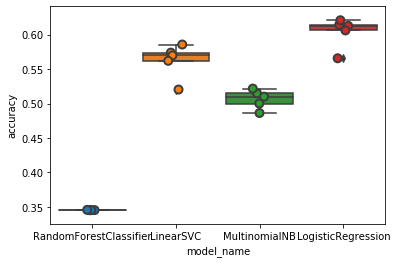

In [37]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


### Generalization of the Logistic Regression

In [ ]:
pipelineLogistic = pipelines[3][1]

parameters = {
    "countVectorizer__ngram_range": [(1,1), (1,2)],
    "countVectorizer__binary": [True, False],
    "classifier__C": [0.1, 1, 10]
}

from sklearn.model_selection import GridSearchCV
gridBest = GridSearchCV(pipelineLogistic, param_grid=parameters, cv=5)
gridBest.fit(training_data["words"], training_data["party"])

We now want to try other models, in order to improve our results. We will use 4 different models(Multinomial Bayes, Linear SVC, Random Forest and Logistic Regression).

The first step is to do the model selection. For that, we use a 5-flold cross validation. Therefore, we calcualate the accuracies for all 4 models and we select the one with the highest accuracy. 

We now have the best model between those. It is time to see how good

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>